<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/WHITEBOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('ufo.csv', encoding='UTF-8')
data.head()

,datetime,city,state,country,shape,duration,total_time,comments,date_posted,latitude,longitude,year,distance
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,2004,1242.667772
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,2005,1325.486319
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,2008,6515.416577
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,2004,1211.971352
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,2004,6960.923396


Vemos el formato de nuestra columnas

In [111]:
data.dtypes

datetime        object
city            object
state           object
country         object
shape           object
duration       float64
total_time      object
comments        object
date_posted     object
latitude       float64
longitude      float64
year             int64
distance       float64
dtype: object

Resumen de las columnas

In [112]:
data.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration',
       'total_time', 'comments', 'date_posted', 'latitude', 'longitude',
       'year', 'distance'],
      dtype='object')

Vemos la forma de nuestro dataset

In [113]:
data.shape

(78509, 13)

In [114]:
data.head()

,datetime,city,state,country,shape,duration,total_time,comments,date_posted,latitude,longitude,year,distance
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,2004,1242.667772
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,2005,1325.486319
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,2008,6515.416577
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,2004,1211.971352
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,2004,6960.923396


In [115]:
data.shape

(78509, 13)

Vamos a limpiar nuestros datos

In [116]:
data.isnull().values.any()

True

In [117]:
data.isna().sum()

datetime          0
city              0
state          5795
country        9562
shape          1910
duration          0
total_time        0
comments         14
date_posted       0
latitude          0
longitude         0
year              0
distance          0
dtype: int64

In [118]:
data['country'] = data['country'].dropna()
data['state'] = data['state'].dropna()

Elimino las filas cuyo país no es USA

In [119]:
data = data[data['country'] != 'ca']
data = data[data['country'] != 'gb']

Elimino las filas cuya distancia es menor a 300

In [120]:
data = data[data['distance'] > 300]

Quito las horas que superan las 24:00

In [121]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')
data = data[data['datetime'].dt.hour < 24]

Elimino los avistamientos anteriores al 2004


In [122]:
fecha_limite = pd.to_datetime('2004-01-01')

data = data[data['datetime'] > fecha_limite]

In [123]:
data.shape

(46881, 13)

Ahora analizo en que ciudad han habido más avistamientos

In [124]:
num_sightings = data['city'].value_counts()
num_sightings.head()

seattle        282
phoenix        280
las vegas      227
portland       219
los angeles    213
Name: city, dtype: int64

Lo más probable es que el dispositivo se encuentre en uno de esas 5 ciudades pero vamos a comprobarlo

Agrupar por coordenadas y contar avistamientos

In [125]:
location_counts = data.groupby(['latitude', 'longitude']).size().reset_index(name='Counts')
location_counts.head()

,latitude,longitude,Counts
0,-46.163992,169.875050,1
1,-45.097512,170.970415,1
2,-45.031162,168.662644,1
3,-43.532054,172.636225,5
4,-43.489806,172.111467,1


Encontrar la ubicación con más avistamientos

In [126]:
most_sightings = location_counts[location_counts['Counts'] == location_counts['Counts'].max()]
most_sightings

,latitude,longitude,Counts
12764,47.606389,-122.330833,304


Creo un mapa para ver donde han habido más avistamientos

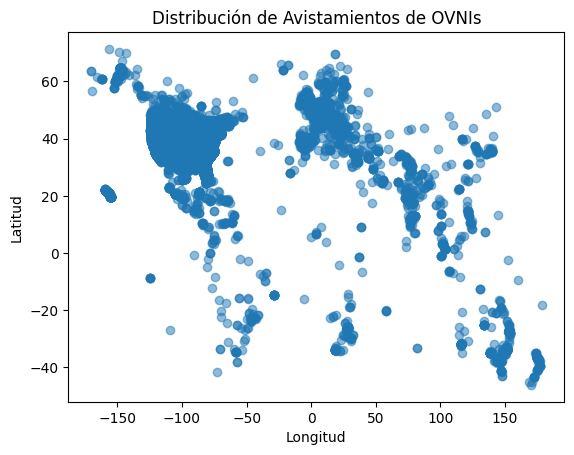

Ubicación con más avistamientos:
        latitude   longitude  Counts
12764  47.606389 -122.330833     304


In [127]:
plt.scatter(data['longitude'], data['latitude'], alpha=0.5)
plt.title('Distribución de Avistamientos de OVNIs')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Vuelvo a imprimir la ubicación con más avistamientos
print("Ubicación con más avistamientos:")
print(most_sightings)

Si ponemos las coordenadas en el mapa vemos que la latitud 47.606389 y longitud -122.330833 se encuentra en Seattle (Washington) por lo que el dispositivo se ha activado en Seattle